# Pytorch資料庫
Pytorch: https://pytorch.org/
<img src="Image/pytorch.png">

-----------------------------------
## 深度學習發展用到的公開資料庫很多，如果覺得要一個一個去下載和理解太麻煩，pytorch提供了一個非常簡單使用的dataloader模組 (torchvision)
pytorch vision: https://pytorch.org/vision/0.8/datasets.html
<img src="Image/pytorch_database.png">

pytorch提供了torchvision模組,但不是資料都已經在你的電腦內了

如果電腦內沒有下載好的資料，可用pytorch的模組同時下載和訓練。

我們用MNIST和CIFAR10當作範例。

-------------------------------------------

### 範例: MNIST
MNIST是灰階資料，所以只有一個8bits(0~255)的影像儲存

In [1]:
from torchvision import datasets
dataset_train_MNIST = datasets.MNIST('./dataset', train=True, download=False)
dataset_test_MNIST = datasets.MNIST('./dataset', train=False, download=False)

In [2]:
print(dataset_train_MNIST)
print(dataset_test_MNIST)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./dataset
    Split: Train
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./dataset
    Split: Test


我們可以利用.classes來看這個資料級有什麼類別的資料。

In [3]:
dataset_train_MNIST.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']


利用.data來看這個影像。

利用.targets來看這個資料的類別。

In [4]:
print(dataset_train_MNIST.data.shape)
print(dataset_train_MNIST.data[0,:,:])
print(dataset_train_MNIST.targets[0])


torch.Size([60000, 28, 28])
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,

In [5]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 10))
for ax, image, label in zip(axes, dataset_train_MNIST.data, dataset_train_MNIST.targets):
    ax.set_axis_off()
    ax.imshow(image)
    ax.set_title('label: %i' % label)

In [6]:
for i in range(10):
     print('number of data for label {}: {}'.format(i,len(dataset_train_MNIST.targets==i)))

number of data for label 0: 60000
number of data for label 1: 60000
number of data for label 2: 60000
number of data for label 3: 60000
number of data for label 4: 60000
number of data for label 5: 60000
number of data for label 6: 60000
number of data for label 7: 60000
number of data for label 8: 60000
number of data for label 9: 60000


-------------------------------------------

### 範例: CIFAR10

In [7]:
dataset_train_CIFAR=datasets.CIFAR10('./dataset', train=True,  download=False)
dataset_test_CIFAR=datasets.CIFAR10('./dataset', train=False,  download=False)

In [8]:
print(dataset_train_CIFAR)
print(dataset_test_CIFAR)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./dataset
    Split: Train
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./dataset
    Split: Test


利用物件屬性的.classes來看這個CIFAR10資料庫有什麼類別判斷

In [9]:
print(dataset_train_CIFAR.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


利用.shape來看影像大小

In [10]:
print(dataset_train_CIFAR.data.shape)

(50000, 32, 32, 3)


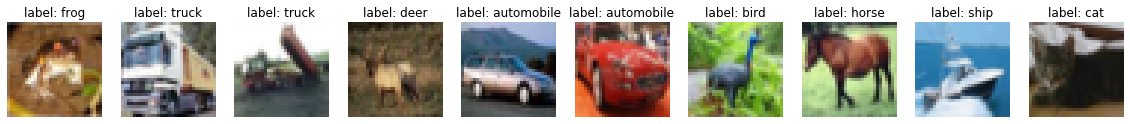

In [11]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 10))
for ax, image, label in zip(axes, dataset_train_CIFAR.data, dataset_train_CIFAR.targets):
    ax.set_axis_off()
    ax.imshow(image)
    ax.set_title('label: %s' % dataset_train_CIFAR.classes[int(label)])

In [12]:
import numpy as np
n_training=np.zeros(10)
n_testing=np.zeros(10)
for data in dataset_train_CIFAR:
    n_training[data[1]]+=1
for data in dataset_test_CIFAR:
    n_testing[data[1]]+=1
    
for i in range(10):
     print('CIFAR10 # Training :{}, # Testing:{}, for label: {}'.format(n_training[i],n_testing[i],dataset_train_CIFAR.classes[int(i)]))

CIFAR10 # Training :5000.0, # Testing:1000.0, for label: airplane
CIFAR10 # Training :5000.0, # Testing:1000.0, for label: automobile
CIFAR10 # Training :5000.0, # Testing:1000.0, for label: bird
CIFAR10 # Training :5000.0, # Testing:1000.0, for label: cat
CIFAR10 # Training :5000.0, # Testing:1000.0, for label: deer
CIFAR10 # Training :5000.0, # Testing:1000.0, for label: dog
CIFAR10 # Training :5000.0, # Testing:1000.0, for label: frog
CIFAR10 # Training :5000.0, # Testing:1000.0, for label: horse
CIFAR10 # Training :5000.0, # Testing:1000.0, for label: ship
CIFAR10 # Training :5000.0, # Testing:1000.0, for label: truck


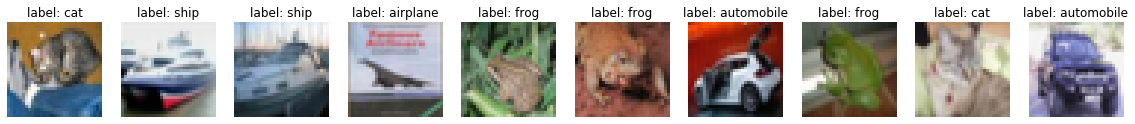

In [13]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 10))
for ax, image, label in zip(axes, dataset_test_CIFAR.data, dataset_test_CIFAR.targets):
    ax.set_axis_off()
    ax.imshow(image)
    ax.set_title('label: %s' % dataset_test_CIFAR.classes[int(label)])

-------------------------------------------

### 範例: CIFAR100

In [14]:
dataset_train_CIFAR100=datasets.CIFAR100('./dataset', train=True,  download=False)
dataset_test_CIFAR100=datasets.CIFAR100('./dataset', train=False,  download=False)

In [15]:
print(dataset_train_CIFAR100)
print(dataset_test_CIFAR100)

Dataset CIFAR100
    Number of datapoints: 50000
    Root location: ./dataset
    Split: Train
Dataset CIFAR100
    Number of datapoints: 10000
    Root location: ./dataset
    Split: Test


In [16]:
print(dataset_train_CIFAR100.classes)
print(dataset_train_CIFAR100.data.shape)

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',

In [17]:
import numpy as np
n_training=np.zeros(100)
n_testing=np.zeros(100)
for data in dataset_train_CIFAR100:
    n_training[data[1]]+=1
for data in dataset_test_CIFAR100:
    n_testing[data[1]]+=1
    
for i in range(100):
     print('CIFAR100 # Training :{}, # Testing:{}, for label: {}'.format(n_training[i],n_testing[i],dataset_train_CIFAR100.classes[int(i)]))

CIFAR100 # Training :500.0, # Testing:100.0, for label: apple
CIFAR100 # Training :500.0, # Testing:100.0, for label: aquarium_fish
CIFAR100 # Training :500.0, # Testing:100.0, for label: baby
CIFAR100 # Training :500.0, # Testing:100.0, for label: bear
CIFAR100 # Training :500.0, # Testing:100.0, for label: beaver
CIFAR100 # Training :500.0, # Testing:100.0, for label: bed
CIFAR100 # Training :500.0, # Testing:100.0, for label: bee
CIFAR100 # Training :500.0, # Testing:100.0, for label: beetle
CIFAR100 # Training :500.0, # Testing:100.0, for label: bicycle
CIFAR100 # Training :500.0, # Testing:100.0, for label: bottle
CIFAR100 # Training :500.0, # Testing:100.0, for label: bowl
CIFAR100 # Training :500.0, # Testing:100.0, for label: boy
CIFAR100 # Training :500.0, # Testing:100.0, for label: bridge
CIFAR100 # Training :500.0, # Testing:100.0, for label: bus
CIFAR100 # Training :500.0, # Testing:100.0, for label: butterfly
CIFAR100 # Training :500.0, # Testing:100.0, for label: camel
C

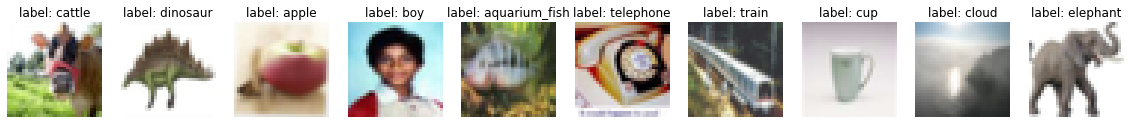

In [18]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 10))
for ax, image, label in zip(axes, dataset_train_CIFAR100.data, dataset_train_CIFAR100.targets):
    ax.set_axis_off()
    ax.imshow(image)
    ax.set_title('label: %s' % dataset_train_CIFAR100.classes[int(label)])

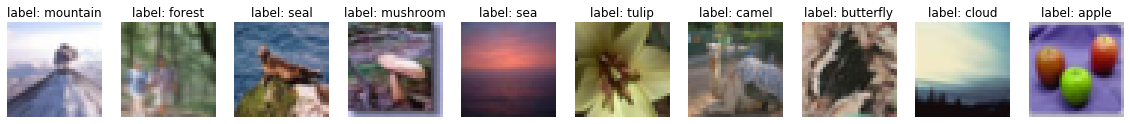

In [19]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 10))
for ax, image, label in zip(axes, dataset_test_CIFAR100.data, dataset_test_CIFAR100.targets):
    ax.set_axis_off()
    ax.imshow(image)
    ax.set_title('label: %s' % dataset_test_CIFAR100.classes[int(label)])